In [1]:
import random
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio,structural_similarity


In [2]:
i,j=0,0
for _ in range(1000000):
    x=random.uniform(-1,1)
    y=random.uniform(-1,1)
    if x**2+y**2<=1:
        i+=1
    j+=1
print(4*(i/j))


3.14162


In [3]:
m=0
sigma=1
m1_y=[]

# method 1
for _ in range(1000):
    x1=random.uniform(0,1)
    x2=random.uniform(0,1)
    y1=sigma*np.sqrt(-2*np.log(x1))*np.cos(2*np.pi*x2)+m
    y2=sigma*np.sqrt(-2*np.log(x1))*np.sin(2*np.pi*x2)+m
    m1_y.append(y1)
m1_y=np.array(m1_y)
print('method 1 mean:',m1_y.mean(),',var:',m1_y.var())

#method 2
m2_y=[]
for _ in range(1000):
    X=np.array([random.uniform(0,1) for _ in range(12)])
    Y=X.sum()-6
    Z=sigma*Y+m
    m2_y.append(Z)
m2_y=np.array(m2_y)
print('method 2 mean:',m2_y.mean(),',var:',m2_y.var())

method 1 mean: 0.04468452081836277 ,var: 1.0357620597288655
method 2 mean: 0.01548648695077237 ,var: 1.0054480846653446


In [4]:
mean=0
var=1
img=cv.imread('test.png',cv.IMREAD_GRAYSCALE)
noise=np.random.normal(mean,var**0.5,img.shape)
img_new=np.uint8(np.array(img)+noise)
print('PSNR:',peak_signal_noise_ratio(img,img_new))
print('SSIM:',structural_similarity(img,img_new))

PSNR: 46.89714193060268
SSIM: 0.9915482053701083


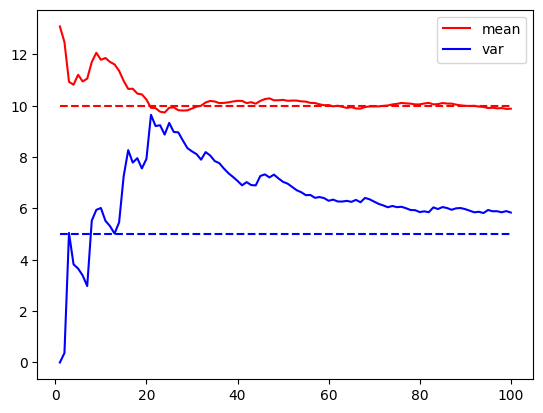

In [5]:
def Mean_and_Std(x):
    X=np.array(x)
    return X.mean(),X.var()

n=500
conut=[i for i in range(1,101)]
std_mean=[10 for i in range(100)]
std_var=[5 for i in range(100)]
X=[]
mean_c=[]
std_c=[]
for i in range(100):
    x=np.random.normal(10,5**0.5)
    X.append(x)
    mean_i,std_i=Mean_and_Std(X)
    mean_c.append(mean_i)
    std_c.append(std_i)
plt.figure()
plt.plot(conut,mean_c,'r-',label='mean')
plt.plot(conut,std_mean,'r--')
plt.plot(conut,std_c,'b-',label='var')
plt.plot(conut,std_var,'b--')
plt.legend()
plt.show()

In [6]:
a=1/2
b=1/3
state_1,state_2=0,0
state=1
for i in range(1000):
    if state==1:
        state_1+=1
        x=np.random.uniform(0,1)
        if x>0.5:
            state=2
    elif state==2:
        state_2+=1
        x=np.random.uniform(0,1)
        if x>(1/3):
            state=1
print(state_1/1000,state_2/1000)
print((1-b)/(2-a-b),(1-a)/(2-a-b))

0.557 0.443
0.5714285714285715 0.42857142857142855


In [7]:
def bin_Gass(x,mu,sigma):
    inv_sigma=np.linalg.inv(sigma)
    a=(1/((2*np.pi)*np.linalg.det(sigma)**0.5))*np.exp(-0.5*(x-mu)@inv_sigma@(x-mu).T)
    return a

dataset=np.array([[0.697,0.460],[0.774,0.376],[0.634,0.264],[0.608,0.318],[0.556,0.215],
        [0.403,0.237],[0.481,0.149],[0.437,0.211],[0.666,0.091],[0.243,0.267],
        [0.245,0.057],[0.343,0.099],[0.639,0.161],[0.657,0.198],[0.360,0.370],
        [0.593,0.042],[0.719,0.103],[0.359,0.188],[0.339,0.241],[0.282,0.257],
        [0.748,0.232],[0.714,0.346],[0.483,0.312],[0.478,0.437],[0.525,0.369],
        [0.751,0.489],[0.532,0.472],[0.473,0.376],[0.725,0.445],[0.446,0.459]])
k=3
m=30
sigma=np.array([np.array([[0.1,0],[0,0.1]]),np.array([[0.1,0],[0,0.1]]),np.array([[0.1,0],[0,0.1]])])
mu=np.array([dataset[0],dataset[9],dataset[16]])
alpha=np.array([1/3,1/3,1/3])
gamma=np.zeros((m,k))

for _ in range(1000):
    for j in range(m):
        for i in range(k):
            sum=0
            for l in range(k):
                sum+=alpha[l]*bin_Gass(dataset[j],mu[l],sigma[l])
            gamma[j,i]=alpha[i]*bin_Gass(dataset[j],mu[i],sigma[i])/sum
    for i in range(k):
        up=np.array([0,0],dtype=float)
        down=0
        for j in range(m):
            up+=gamma[j,i]*dataset[j]
            down+=gamma[j,i]
        mu[i]=up/down
        
        up=np.array([[0,0],[0,0]],dtype=float)
        for j in range(m):
            diff=dataset[j]-mu[i]
            up+=gamma[j,i]*np.array([[diff[0]**2,diff[0]*diff[1]],[diff[0]*diff[1],diff[1]**2]])
        sigma[i]=up/down
        
        alpha[i]=down/m


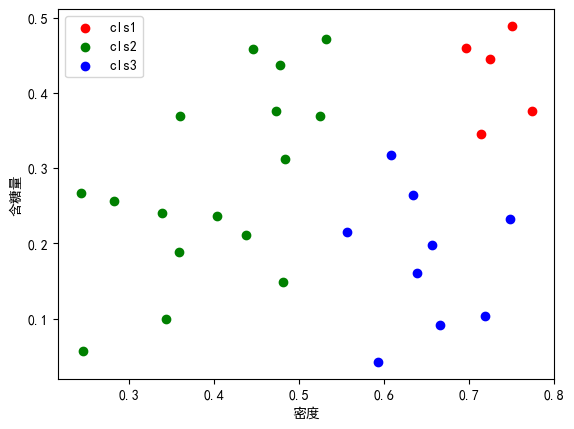

In [8]:
labels = gamma.T.argmax(axis=0)
c1x, c1y, c2x, c2y, c3x, c3y = [], [], [], [], [], []
plt.figure()
plt.rcParams['font.sans-serif'] = ['SimHei']
for i in range(m):
    if labels[i] == 0:
        c1x.append(dataset[i][0])
        c1y.append(dataset[i][1])
    elif labels[i] == 1:
        c2x.append(dataset[i][0])
        c2y.append(dataset[i][1])
    else:
        c3x.append(dataset[i][0])
        c3y.append(dataset[i][1])
plt.scatter(c1x, c1y, c='r', label='cls1')
plt.scatter(c2x, c2y, c='g', label='cls2')
plt.scatter(c3x, c3y, c='b', label='cls3')
plt.xlabel('密度')
plt.ylabel('含糖量')
plt.legend()
plt.show()